In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

%run Geometric_Code.ipynb

plt.rcParams["figure.figsize"] = (12, 9)

In [2]:
# how to generate a 3-layer network if you have a 
# n_segments = 2*(n_layers-1) + 1 = 2*n_layers-1
# n_vertices = 2*n_layers - 2
# n_ends = 2
# pl = [v0, p1, p2, p3, p4, v5]

def network_from_polyline(polyline):
    
    pl = polyline.copy() # polyline = np.array(2*n_layers x 3)
    
    n_vert = pl.shape[0]
    n_layers = int(n_vert/2)

    pl[0] = pl[1] + pl[0]
    pl[n_vert-1] = pl[n_vert-2] + pl[n_vert-1]
    
    W = []
    for L in range(1, n_layers, 1): 
        L1 = n_vert - 1 - L 
        # L is the current point and L1 is the corresponding point
        # need pl[L-1] and pl[L] plus pl[L1] and pl[L1+1]
        v_LL1 = pl[L1] - pl[L]
        p_L1 = pl[L-1]  + v_LL1 
        p_L  = pl[L1+1] - v_LL1
        O = point_of_intersection((line_from_pair_of_points((p_L, pl[L])) , line_from_pair_of_points((pl[L1], p_L1))))
        source = (pl[L], pl[L1], O)
        image = ((1.,0.,1.), (0.,1.,1.), (0.,0.,1.))
        W.append(affine_map(source, image))
        pl = pl.dot(W[-1].T)
    W.append(np.array([1,1,-1]))
    return W


In [3]:
#generate a random polyline that the network can produce geometrically 

pl = np.array([[0,-1,0],[1,0,1],[1.25,1,1],[0.5,1.5,1],[0,1,1],[-1,0,0]])
pl_ = pl.copy()

pl_[0,0] = 1
pl_[5,1] = 1

U = np.array([[1,   -0.25,   1.],
              [-0.25, 1.3, 0.25], 
              [0,0,1]]) 
#pl = pl.dot(U.T)
#pl_ = pl_.dot(U.T)


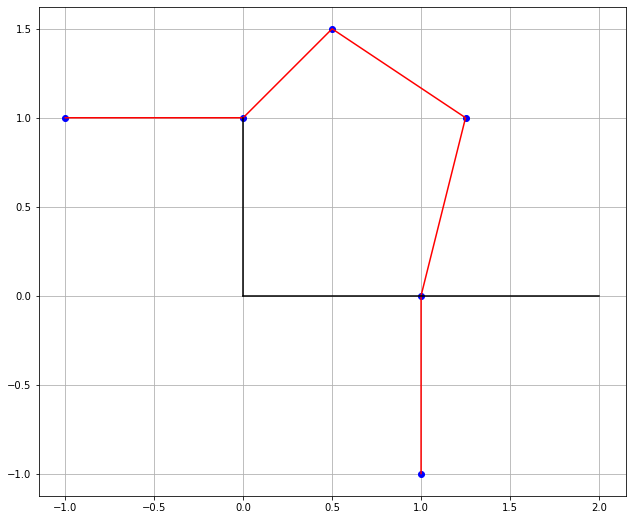

In [8]:
#plot the points 

a = 1
b = 2 #np.sqrt(3)
c = 1
eps = 5

fig, axs = plt.subplots(1,1)
axs.set_aspect('equal')

for p in pl_:
    axs.plot(p[0], p[1], 'bo')
axs.plot(pl_[:,0], pl_[:,1], 'r')
#axs.plot([trg_1[0,0], trg_1[0,2]], [trg_1[1,0], trg_1[1,2]], 'r')
#axs.plot([trg_1[0,1], trg_1[0,2]], [trg_1[1,1], trg_1[1,2]], 'r')
axs.plot([b, 0],[0, 0], 'k')
axs.plot([0, 0],[0, a], 'k')

plt.grid()
plt.show()

In [13]:
W = network_from_polyline(pl)
for i in W:
    print(i)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 1.14285714 -0.28571429 -0.14285714]
 [-0.8         0.8         0.2       ]
 [ 0.          0.          1.        ]]
[ 1  1 -1]


500
[0. 1. 1.]
0


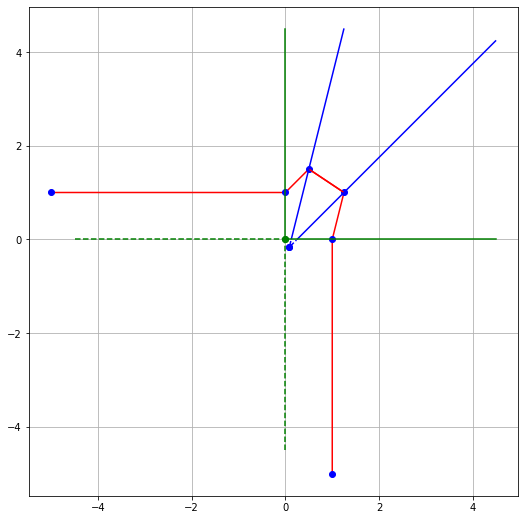

In [10]:
#check polyline config

fig, axs = plt.subplots(1,1)
axs.set_aspect('equal')

U = W
draw_polyline(axs, U, 5, 0)

k = 10
n = 1000
I = [[-k, k], n]

draw_sectors(axs,matrix_list=U,   
                colors_list=['g', 'b', 'r'],   
                width_list=len(U)*[I],  
                height_list=len(U)*[I],  
                frame_shape=[[-4.5,4.5],[-4.5,4.5]],  
                remove_dotted_list=[False, False, True])

plt.grid()
plt.show()

# NEW MATRIX CONFIG WITH GROUP D

In [17]:
d1 = [3,2,1]
d2 = [5,4,1]
d3 = [7,6,1]

D1 = np.diag(d1)
D2 = np.diag(d2)
D3 = np.diag(d3)

D1_ = np.linalg.inv(D1)
D2_ = np.linalg.inv(D2)
D3_ = np.linalg.inv(D3)

In [18]:
w1 = np.array(([1, 0, 0],
               [0 ,1, 0],
               [0, 0, 1]))

w2 = np.array(([ 1.14285714, -0.28571429, -0.14285714],
               [-0.8, 0.8, 0.2],
               [0, 0, 1]))

w3 =np.array(([1, 1, -1]))

In [19]:
w11 = np.matmul(D1, w1)
w21 = np.matmul(D2,(np.matmul(w2, D1_)))
w31 = np.matmul(w3, D2_)

In [20]:
U2 = [w1,w2,w3]
print(U)

[array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), array([[ 1.14285714, -0.28571429, -0.14285714],
       [-0.8       ,  0.8       ,  0.2       ],
       [ 0.        ,  0.        ,  1.        ]]), array([ 1,  1, -1])]


500
[0. 1. 1.]
0


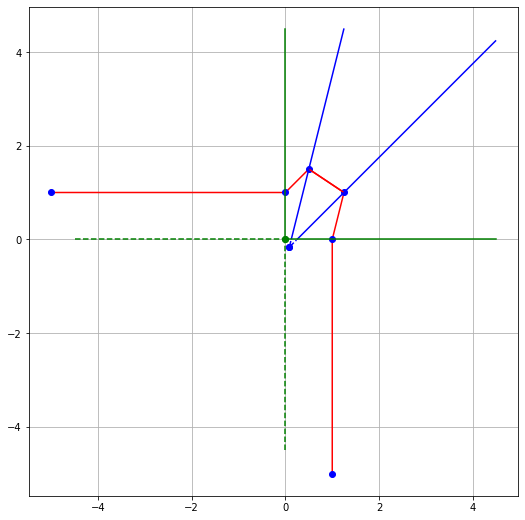

In [21]:
#check polyline config

fig, axs = plt.subplots(1,1)
axs.set_aspect('equal')


draw_polyline(axs, U2, 5, 0)

k = 10
n = 1000
I = [[-k, k], n]

draw_sectors(axs,matrix_list=U2,   
                colors_list=['g', 'b', 'r'],   
                width_list=len(U)*[I],  
                height_list=len(U)*[I],  
                frame_shape=[[-4.5,4.5],[-4.5,4.5]],  
                remove_dotted_list=[False, False, True])

plt.grid()
plt.show()